In [ ]:
!pip install ultralytics
!pip install kaggle

In [34]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import display, Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/ColabNotebooks/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d pkdarabi/cardetection

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/cardetection
License(s): Attribution 4.0 International (CC BY 4.0)
 76% 76.0M/99.8M [00:00<00:00, 75.9MB/s]
100% 99.8M/99.8M [00:01<00:00, 97.4MB/s]


In [ ]:
! unzip cardetection.zip

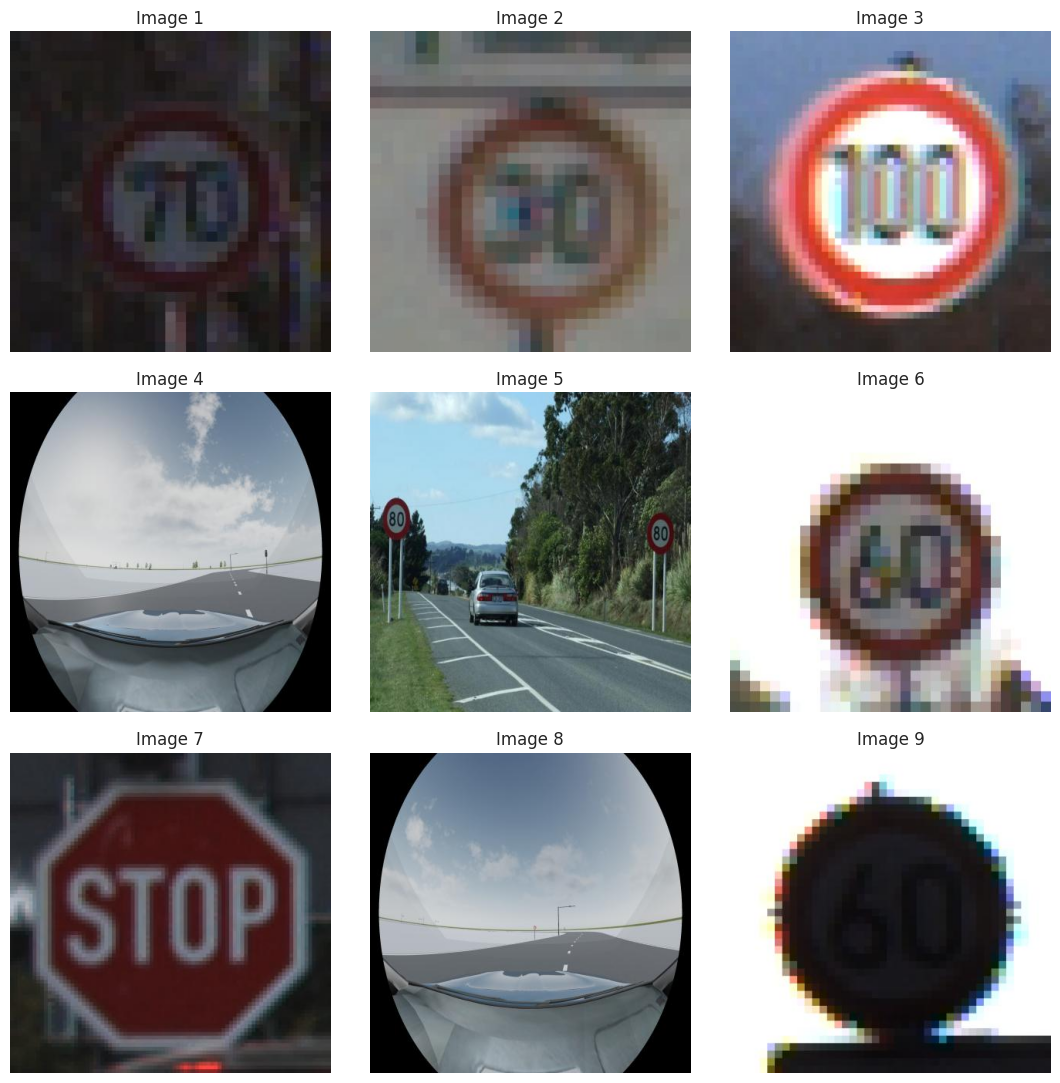

In [ ]:
Image_dir = '/content/car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Get the size of the image
image = cv2.imread("/content/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.



image 1/1 /content/car/train/images/000014_jpg.rf.5f2c12d0dff41fd6105dc41dd6abafb3.jpg: 640x640 (no detections), 14.3ms
Speed: 25.1ms preprocess, 14.3ms inference, 113.4ms postprocess per image at shape (1, 3, 640, 640)


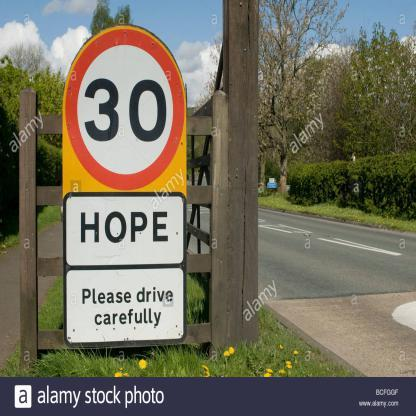

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/car/train/images/000014_jpg.rf.5f2c12d0dff41fd6105dc41dd6abafb3.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
!pip install --upgrade ultralytics ray

In [10]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/car/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')

Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

train: Scanning /content/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 14.32G reserved, 1.21G allocated, -0.79G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


     3013773       8.209         2.777         25.06         18.77        (1, 3, 640, 640)                    list
     3013773       16.42         2.942         27.27         25.86        (2, 3, 640, 640)                    list
     3013773       32.84         3.269         29.41         31.87        (4, 3, 640, 640)                    list
     3013773       65.67         3.842         41.31         36.85        (8, 3, 640, 640)                    list
     3013773       131.3         5.004         45.09         77.88       (16, 3, 640, 640)                    list
AutoBatch: WARNING ⚠️ error detected: cannot convert float NaN to integer,  using default batch-size 16.


train: Scanning /content/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.27G     0.8439      3.467      1.197         33        640: 100%|██████████| 221/221 [01:22<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]


                   all        801        944      0.233      0.404      0.255      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.74G     0.7648      2.547      1.104         25        640: 100%|██████████| 221/221 [01:14<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]

                   all        801        944      0.328      0.536      0.379      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.74G     0.7418      2.136      1.078         22        640: 100%|██████████| 221/221 [01:13<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.96it/s]

                   all        801        944      0.399      0.616      0.505       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.74G     0.7289      1.847      1.067         27        640: 100%|██████████| 221/221 [01:08<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.42it/s]


                   all        801        944      0.608      0.605      0.665      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.74G     0.7029      1.564      1.052         25        640: 100%|██████████| 221/221 [01:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]

                   all        801        944      0.746      0.658      0.753      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.74G     0.6939      1.399      1.046         22        640: 100%|██████████| 221/221 [01:05<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.48it/s]

                   all        801        944      0.792      0.743      0.813      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.74G     0.6649      1.252       1.04         30        640: 100%|██████████| 221/221 [01:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.25it/s]

                   all        801        944      0.825      0.701      0.815      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.74G     0.6489      1.148      1.017         26        640: 100%|██████████| 221/221 [01:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]

                   all        801        944      0.867      0.768      0.853      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.74G     0.6564      1.066      1.019         19        640: 100%|██████████| 221/221 [01:07<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944      0.904      0.798      0.894      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.74G     0.6363      1.018      1.011         25        640: 100%|██████████| 221/221 [01:09<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        801        944      0.922      0.762      0.873      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.74G     0.6374     0.9783      1.013         17        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]

                   all        801        944      0.924      0.819        0.9      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.74G     0.6189     0.9589      1.003         26        640: 100%|██████████| 221/221 [01:06<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]

                   all        801        944      0.934      0.821      0.907      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.74G     0.6061     0.9006     0.9989         25        640: 100%|██████████| 221/221 [01:08<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]

                   all        801        944      0.888      0.842      0.913      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.74G     0.6025      0.868     0.9948         19        640: 100%|██████████| 221/221 [01:10<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.89it/s]


                   all        801        944       0.92      0.853      0.924      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.74G     0.6028      0.847     0.9877         20        640: 100%|██████████| 221/221 [01:06<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]

                   all        801        944      0.911      0.843      0.918      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.74G     0.5952      0.831     0.9833         24        640: 100%|██████████| 221/221 [01:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]

                   all        801        944      0.922      0.857      0.921      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.74G     0.5977     0.8097     0.9895         16        640: 100%|██████████| 221/221 [01:04<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]

                   all        801        944       0.92      0.861      0.929       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.74G     0.5743     0.7675     0.9789         13        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.39it/s]

                   all        801        944      0.941      0.856      0.933      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.74G     0.5768     0.7502      0.981         19        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.98it/s]

                   all        801        944      0.952       0.86      0.937      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.74G     0.5655     0.7297     0.9734         19        640: 100%|██████████| 221/221 [01:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]

                   all        801        944      0.951      0.874      0.943      0.806


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.74G     0.5632     0.5432     0.9478         12        640: 100%|██████████| 221/221 [01:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.86it/s]

                   all        801        944      0.965      0.857      0.944      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.74G     0.5547     0.4978      0.943         19        640: 100%|██████████| 221/221 [01:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.20it/s]

                   all        801        944      0.928      0.881      0.945      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.74G     0.5459     0.4749     0.9395         11        640: 100%|██████████| 221/221 [01:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.57it/s]

                   all        801        944      0.948      0.891      0.953      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.74G     0.5353     0.4577     0.9291         10        640: 100%|██████████| 221/221 [01:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.45it/s]

                   all        801        944      0.969      0.867      0.951      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.74G     0.5338     0.4367     0.9265         12        640: 100%|██████████| 221/221 [01:00<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.49it/s]

                   all        801        944       0.94      0.902      0.953      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.74G     0.5225     0.4281     0.9211         10        640: 100%|██████████| 221/221 [00:59<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.20it/s]

                   all        801        944      0.943      0.903      0.957      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.74G     0.5226     0.4188     0.9163         15        640: 100%|██████████| 221/221 [01:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.24it/s]

                   all        801        944      0.955      0.898      0.957      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.74G     0.5103     0.4042     0.9139         10        640: 100%|██████████| 221/221 [00:59<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]

                   all        801        944       0.95      0.894       0.96      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.74G     0.5063     0.3942      0.915         12        640: 100%|██████████| 221/221 [01:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.41it/s]

                   all        801        944      0.946      0.908       0.96      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.74G     0.5002     0.3859     0.9105         13        640: 100%|██████████| 221/221 [01:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.43it/s]

                   all        801        944       0.95      0.897      0.961       0.83



30 epochs completed in 0.623 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]


                   all        801        944      0.963      0.888      0.961       0.83
           Green Light         87        122      0.898      0.649      0.864      0.505
             Red Light         74        108        0.9      0.664      0.803      0.509
       Speed Limit 100         52         52       0.97      0.942      0.985      0.885
       Speed Limit 110         17         17      0.887          1      0.992      0.901
       Speed Limit 120         60         60          1       0.91      0.994      0.911
        Speed Limit 20         56         56      0.992      0.982      0.986      0.864
        Speed Limit 30         71         74      0.986      0.959      0.988      0.929
        Speed Limit 40         53         55      0.996      0.927      0.989      0.883
        Speed Limit 50         68         71      0.983      0.811      0.965      0.856
        Speed Limit 60         76         76      0.927      0.921      0.959      0.877
        Speed Limit 7

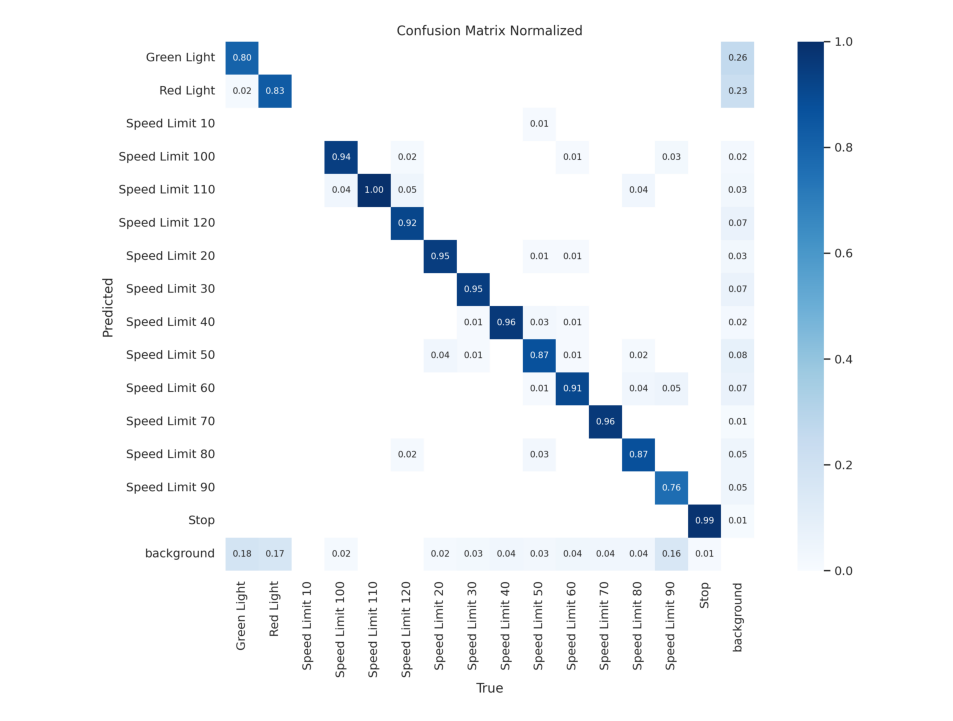

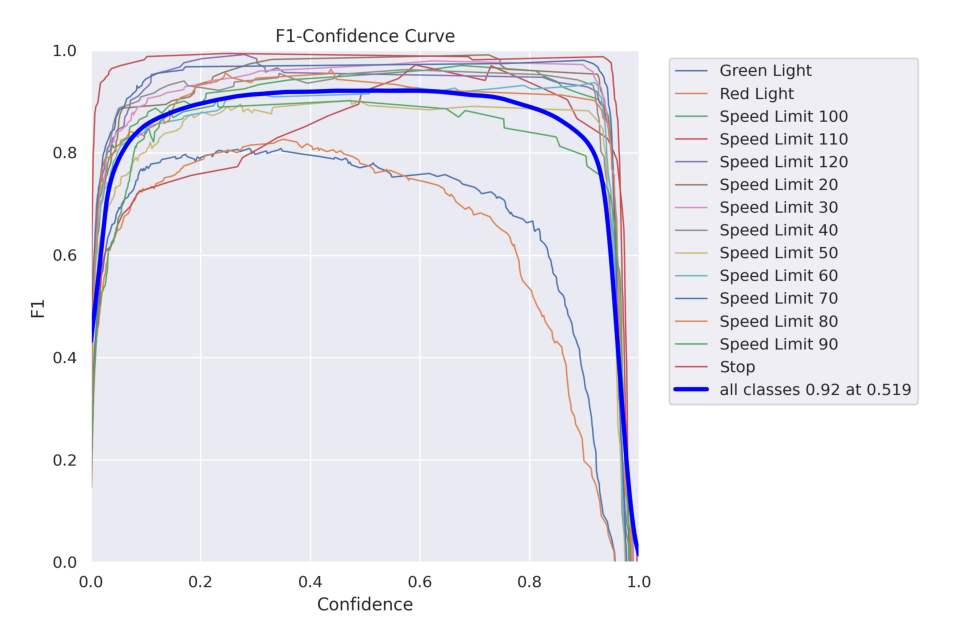

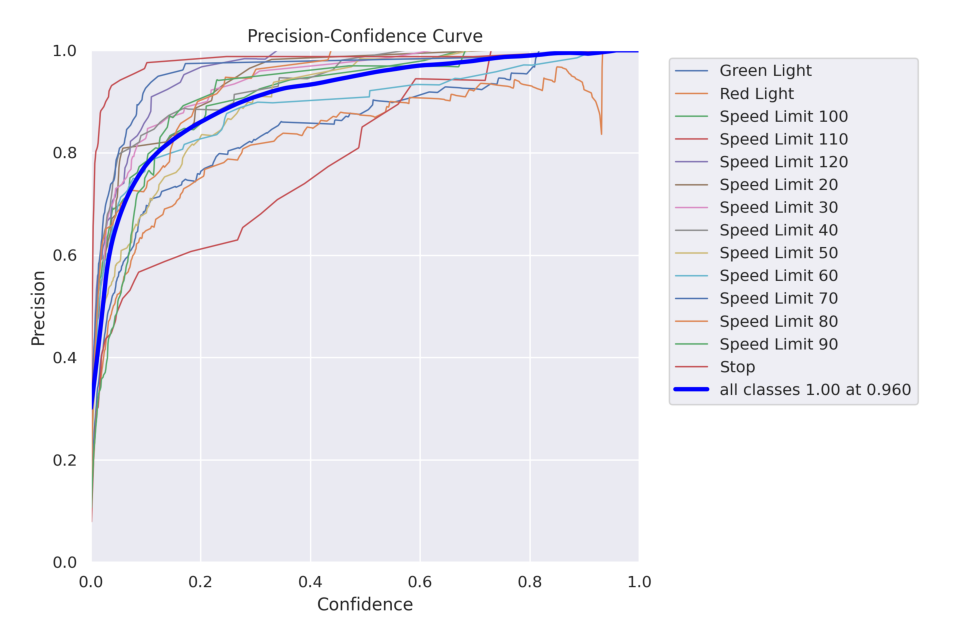

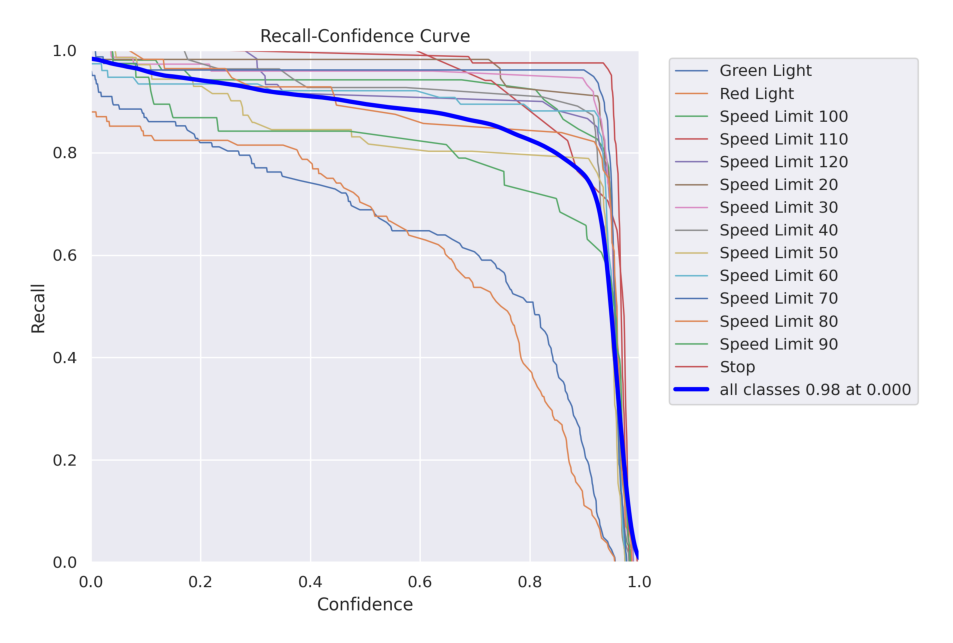

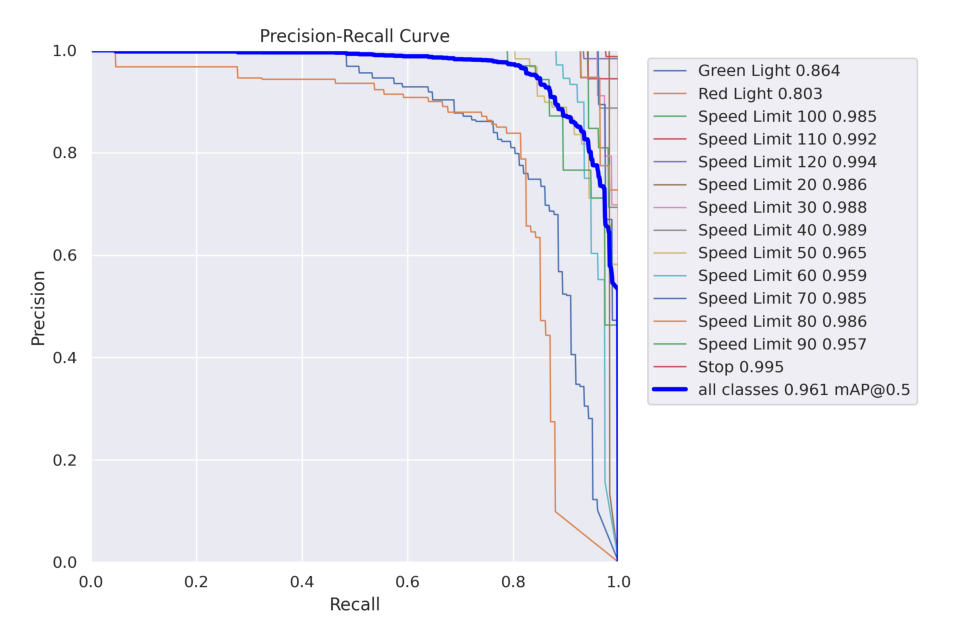

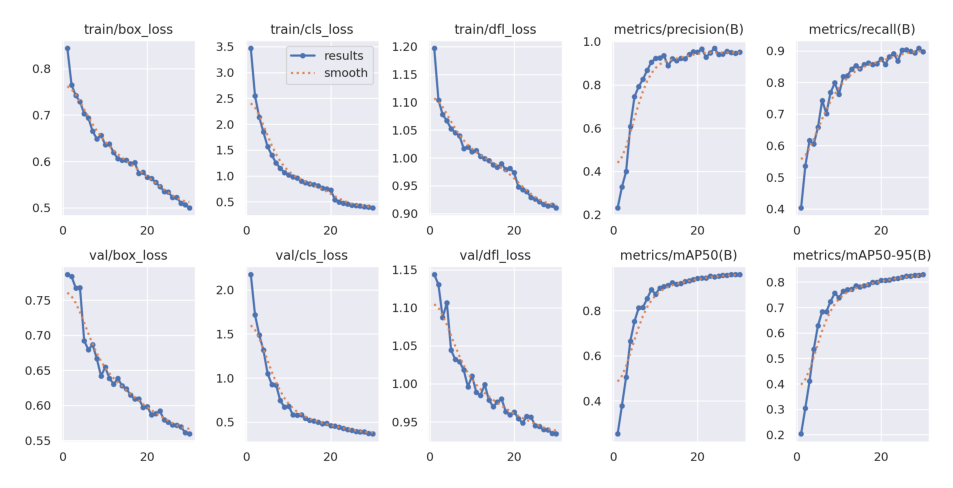

In [11]:
def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/runs/detect/train3'

# Display the images
display_images(post_training_files_path, image_files)

In [13]:
Result_Final_model = pd.read_csv('/content/runs/detect/train3/results.csv')
Result_Final_model

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0       1   108.365         0.84391         3.46694         1.19690   
1       2   190.771         0.76483         2.54717         1.10378   
2       3   271.314         0.74176         2.13645         1.07781   
3       4   347.961         0.72895         1.84730         1.06669   
4       5   423.149         0.70294         1.56393         1.05242   
5       6   496.983         0.69392         1.39874         1.04554   
6       7   571.140         0.66490         1.25161         1.03951   
7       8   651.831         0.64892         1.14799         1.01707   
8       9   732.247         0.65640         1.06628         1.01923   
9      10   809.171         0.63628         1.01846         1.01088   
10     11   883.968         0.63736         0.97833         1.01340   
11     12   958.657         0.61893         0.95892         1.00259   
12     13  1034.560         0.60607         0.90059         0.99886   
13     14  1111.960         0.60252         0.86798         0.99480   
14     15  1186.570         0.60282         0.84703         0.98768   
15     16  1259.920         0.59517         0.83096         0.98328   
16     17  1333.040         0.59769         0.80975         0.98954   
17     18  1406.670         0.57430         0.76748         0.97893   
18     19  1480.130         0.57680         0.75019         0.98103   
19     20  1554.960         0.56546         0.72967         0.97335   
20     21  1627.510         0.56321         0.54323         0.94785   
21     22  1695.820         0.55468         0.49778         0.94298   
22     23  1765.810         0.54590         0.47492         0.93951   
23     24  1833.980         0.53526         0.45774         0.92913   
24     25  1902.690         0.53378         0.43665         0.92653   
25     26  1968.840         0.52253         0.42806         0.92111   
26     27  2038.560         0.52261         0.41881         0.91628   
27     28  2106.420         0.51026         0.40417         0.91391   
28     29  2174.700         0.50626         0.39418         0.91505   
29     30  2244.130         0.50023         0.38595         0.91051   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0                0.23251            0.40399           0.25460   
1                0.32757            0.53611           0.37899   
2                0.39929            0.61626           0.50493   
3                0.60782            0.60516           0.66510   
4                0.74590            0.65795           0.75295   
5                0.79200            0.74321           0.81316   
6                0.82526            0.70136           0.81503   
7                0.86701            0.76783           0.85310   
8                0.90431            0.79841           0.89354   
9                0.92220            0.76207           0.87350   
10               0.92403            0.81859           0.89958   
11               0.93444            0.82112           0.90678   
12               0.88776            0.84198           0.91263   
13               0.92019            0.85341           0.92416   
14               0.91146            0.84267           0.91764   
15               0.92187            0.85682           0.92065   
16               0.92041            0.86140           0.92898   
17               0.94095            0.85650           0.93293   
18               0.95233            0.85954           0.93749   
19               0.95147            0.87365           0.94257   
20               0.96515            0.85717           0.94414   
21               0.92788            0.88059           0.94458   
22               0.94777            0.89131           0.95305   
23               0.96875            0.86728           0.95051   
24               0.94013            0.90244           0.95264   
25               0.94263            0.90298           0.95672   
26               0.95519            0.89794    

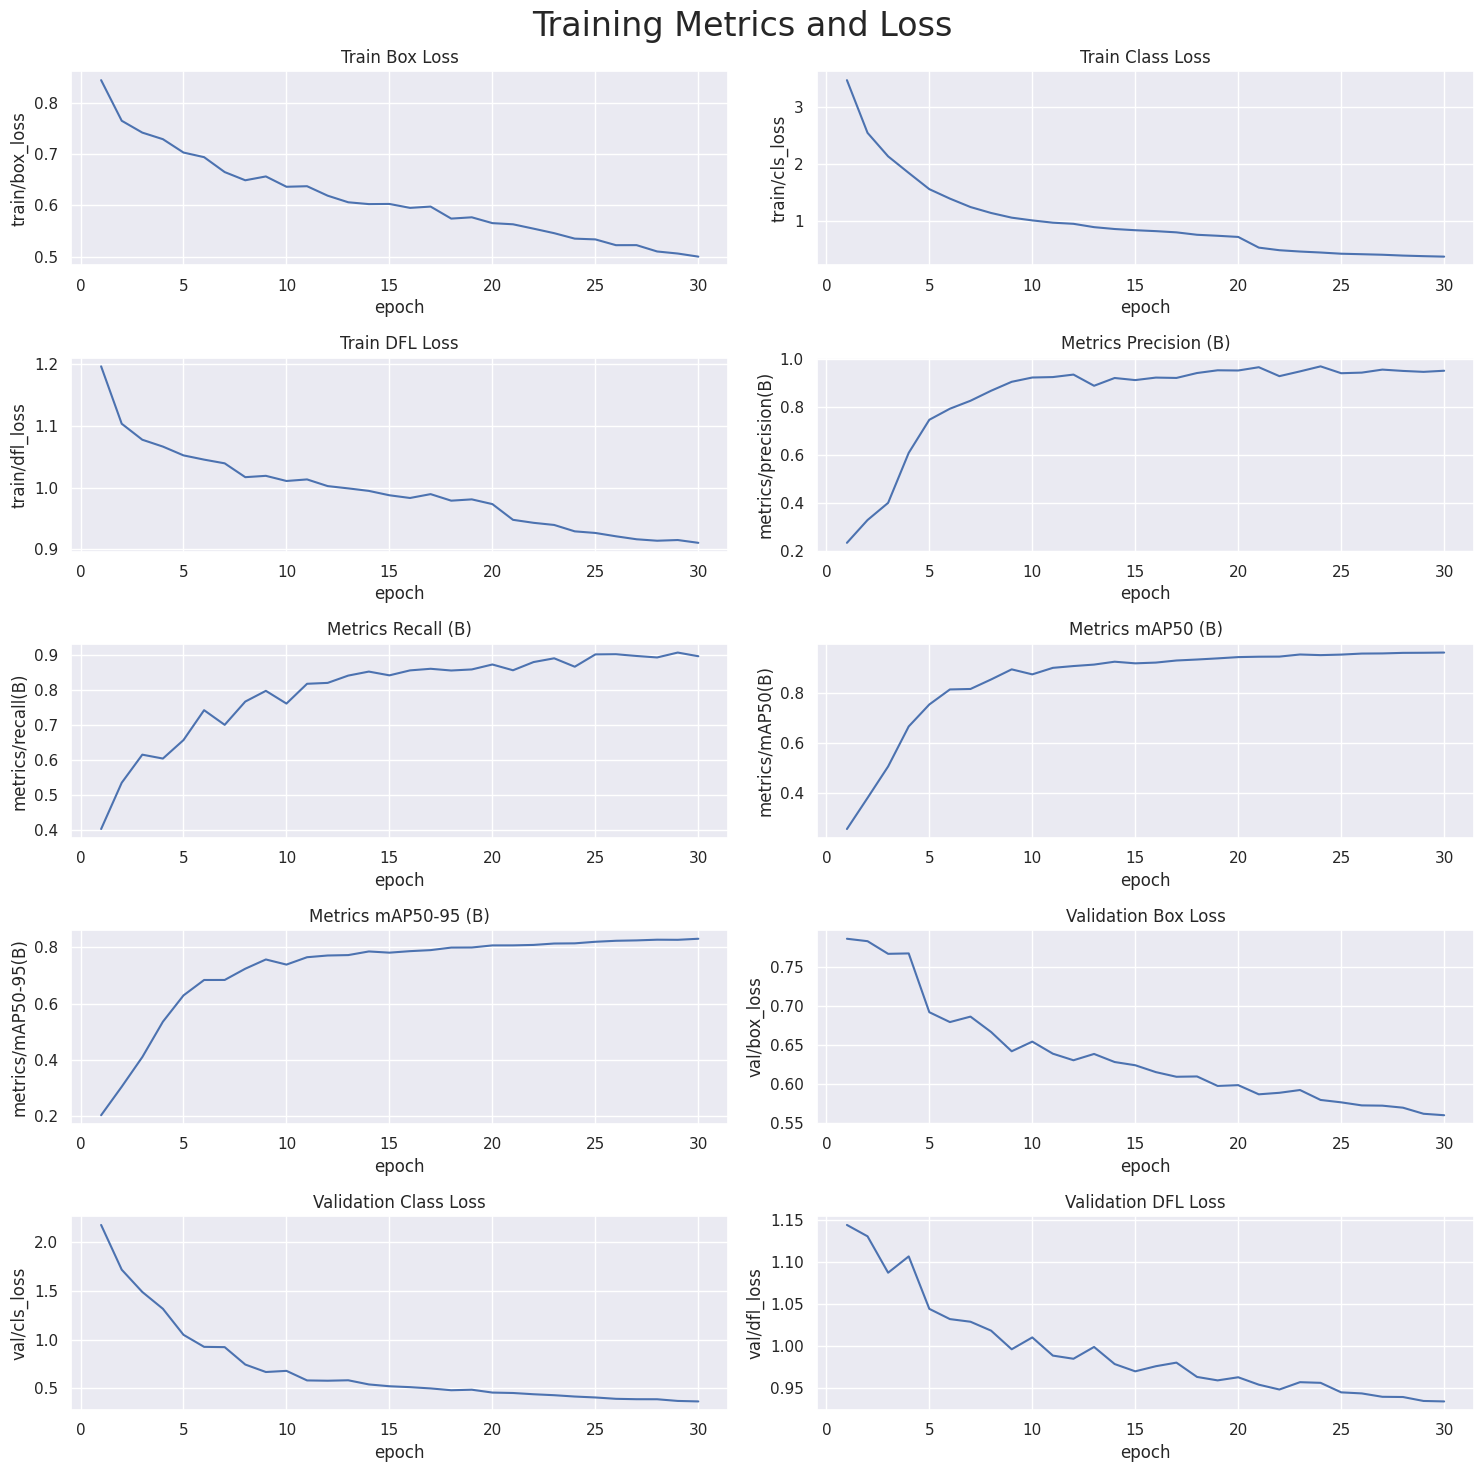

In [14]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [15]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/train3/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:14<00:00,  3.46it/s]


                   all        801        944      0.951      0.899      0.961      0.832
           Green Light         87        122      0.885      0.693      0.867      0.505
             Red Light         74        108      0.887      0.729      0.812      0.509
       Speed Limit 100         52         52      0.959      0.942      0.985      0.886
       Speed Limit 110         17         17      0.805          1      0.992      0.902
       Speed Limit 120         60         60          1      0.912      0.994      0.912
        Speed Limit 20         56         56      0.989      0.982      0.986      0.864
        Speed Limit 30         71         74      0.978      0.959      0.988      0.929
        Speed Limit 40         53         55      0.985      0.927      0.989      0.881
        Speed Limit 50         68         71      0.984       0.84      0.966      0.857
        Speed Limit 60         76         76      0.907      0.921      0.959      0.877
        Speed Limit 7


0: 640x640 1 Speed Limit 110, 8.3ms
Speed: 2.4ms preprocess, 8.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Green Lights, 7.5ms
Speed: 2.9ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 50, 7.5ms
Speed: 3.3ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.7ms
Speed: 3.1ms preprocess, 7.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 100, 1 Speed Limit 120, 7.4ms
Speed: 2.6ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 12.7ms
Speed: 2.6ms preprocess, 12.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 9.8ms
Speed: 2.5ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 50, 9.5ms
Speed: 2.6ms preprocess, 9.5ms

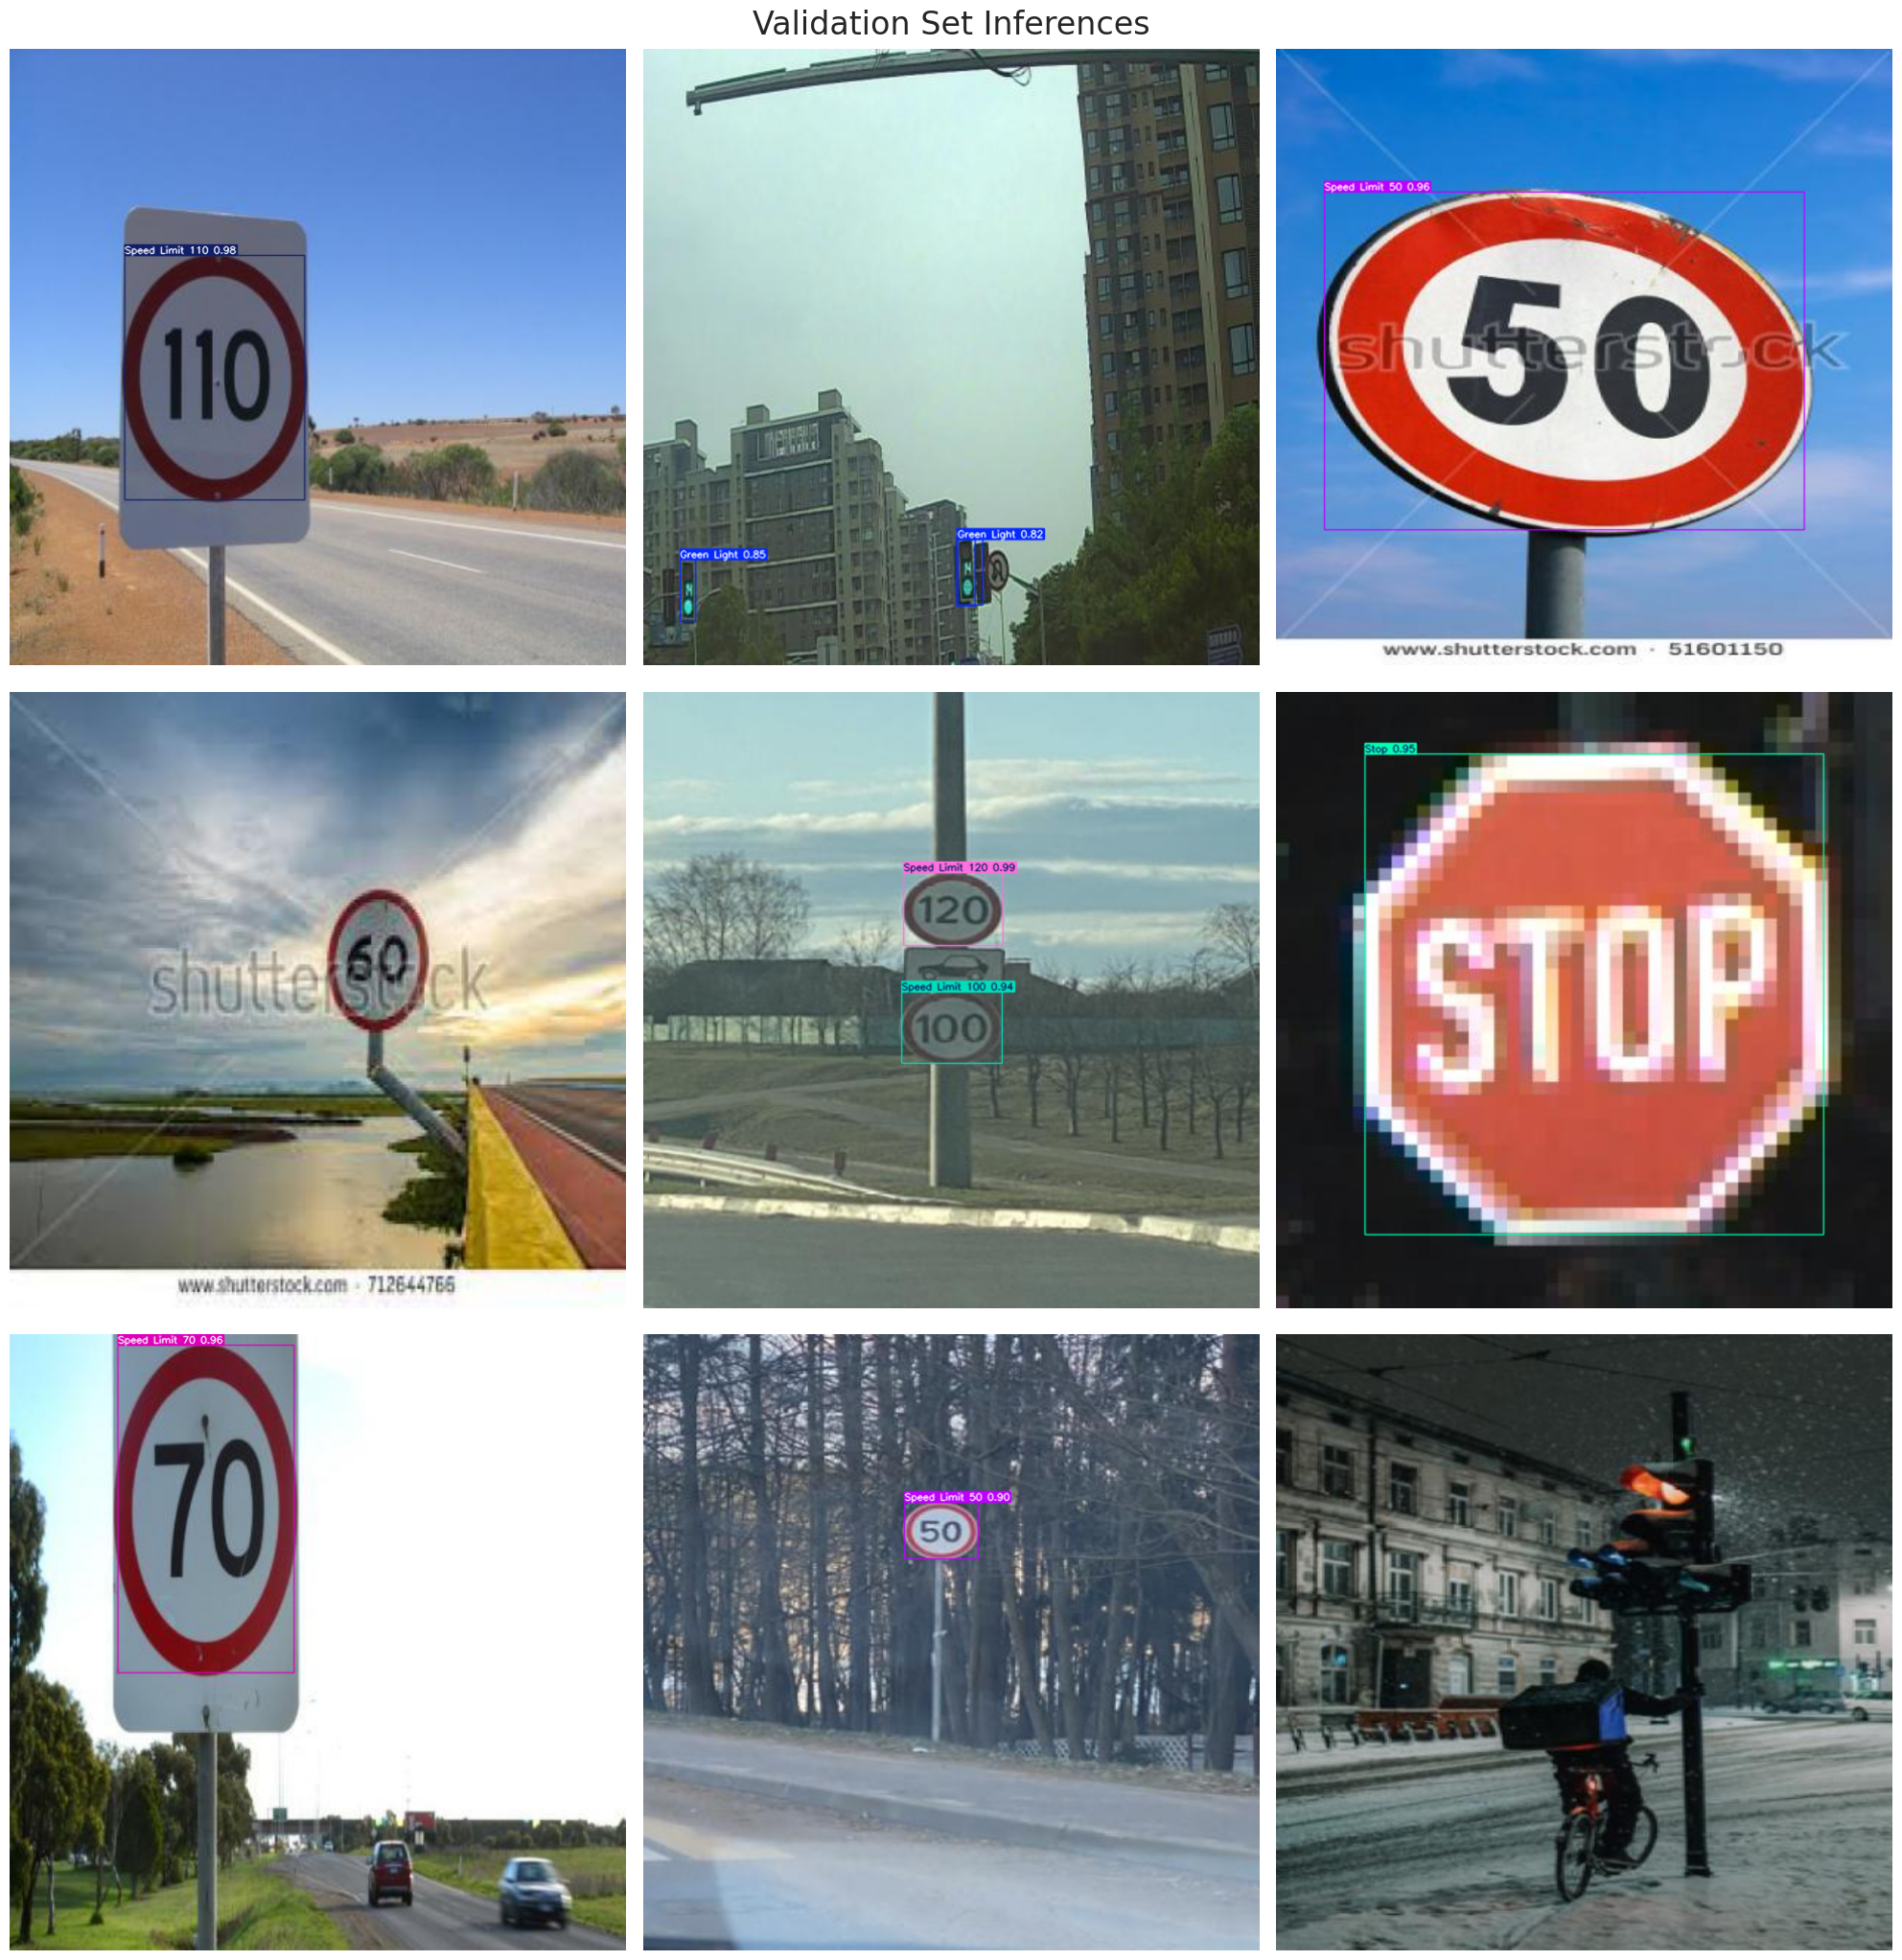

In [16]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/content/car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [37]:
# Convert mp4
!ffmpeg -y -loglevel panic -i /content/video.mp4 /content/output.mp4

!ffmpeg -y -i /content/output.mp4 -vcodec libx264 -pix_fmt yuv420p /content/final_output.mp4

display(Video("/content/final_output.mp4", embed=True))

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [55]:
# Use the model to detect signs
Valid_model.predict(source="/content/video.mp4",stream=True,save = True)

<generator object BasePredictor.stream_inference at 0x799606647d00>

In [41]:
# Use the model to detect signs
results = Valid_model.predict(source="/content/video.mp4", stream=True, save=True)